In [ ]:
from torchvision import transforms
from PIL import Image
import torch

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

def load_image(image_file):
    image = Image.open(image_file).convert('RGB')
    return image

def preprocess_image(image):
    return transform(image).unsqueeze(0)  # batch size of 1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 138.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


✅ Dataset téléchargé dans : /kaggle/input/skin-cancer-mnist-ham10000


100%|██████████| 13.6M/13.6M [00:00<00:00, 148MB/s]


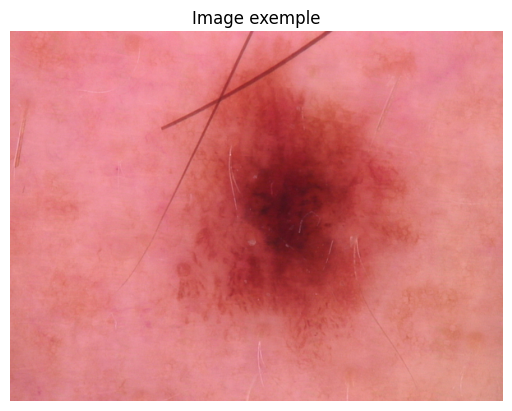

✅ Classe prédite : akiec


In [ ]:
# 📦 Installation des dépendances (à exécuter une seule fois)
!pip install kagglehub streamlit -q
!pip install torch torchvision -q

# 🔁 Imports
import kagglehub
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

# 📥 Téléchargement du dataset HAM10000 depuis KaggleHub
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
print("✅ Dataset téléchargé dans :", path)

# 🖼️ Fonctions utilitaires
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

def load_image(path):
    image = Image.open(path).convert("RGB")
    return image

def preprocess_image(image):
    return transform(image).unsqueeze(0)  # Add batch dimension

# 🧠 Modèle CNN (MobileNetV2 pré-entraîné)
class CNN(nn.Module):
    def __init__(self, num_classes=7):
        super(CNN, self).__init__()
        self.features = models.mobilenet_v2(pretrained=True).features
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(1280, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = nn.functional.adaptive_avg_pool2d(x, 1).reshape(x.shape[0], -1)
        x = self.classifier(x)
        return x

# 📦 Création d’un modèle vide (pour test)
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
model = CNN(num_classes=7)
model.eval()

# 📸 Exemple d'image pour test (remplace par un chemin vers une vraie image)
img_path = path + "/HAM10000_images_part_1/ISIC_0024306.jpg"
image = load_image(img_path)
plt.imshow(image)
plt.title("Image exemple")
plt.axis('off')
plt.show()

# 📊 Prédiction (aléatoire car modèle non entraîné ici)
input_tensor = preprocess_image(image)
output = model(input_tensor)
pred_class = torch.argmax(output, dim=1).item()
print("✅ Classe prédite :", classes[pred_class])


Classes: ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
Epoch 1/5 | Loss: 245.6006 | Train Acc: 67.01% | Val Acc: 66.39% | Test Acc: 67.53%
Epoch 2/5 | Loss: 206.0351 | Train Acc: 67.59% | Val Acc: 68.05% | Test Acc: 68.63%
Epoch 3/5 | Loss: 192.6868 | Train Acc: 68.60% | Val Acc: 69.11% | Test Acc: 70.93%
Epoch 4/5 | Loss: 184.9174 | Train Acc: 69.89% | Val Acc: 69.16% | Test Acc: 70.13%
Epoch 5/5 | Loss: 180.4582 | Train Acc: 70.59% | Val Acc: 69.33% | Test Acc: 70.13%


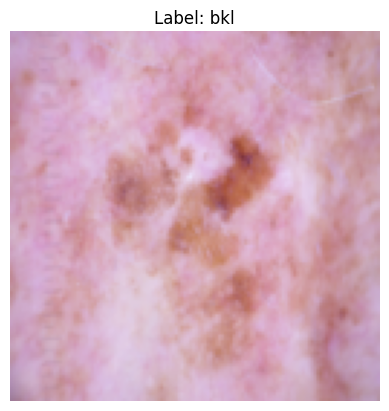

In [ ]:
import os
import pandas as pd
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# --- Chemins dataset ---
base_path = "/kaggle/input/skin-cancer-mnist-ham10000"
img_dir_1 = os.path.join(base_path, "HAM10000_images_part_1")
img_dir_2 = os.path.join(base_path, "HAM10000_images_part_2")
csv_path = os.path.join(base_path, "HAM10000_metadata.csv")

# --- Chargement métadonnées ---
df = pd.read_csv(csv_path)
df["path"] = df["image_id"].apply(
    lambda x: os.path.join(img_dir_1 if os.path.exists(os.path.join(img_dir_1, f"{x}.jpg")) else img_dir_2, f"{x}.jpg")
)

label_dict = {label: idx for idx, label in enumerate(df["dx"].unique())}
df["label"] = df["dx"].map(label_dict)
classes = list(label_dict.keys())

print(f"Classes: {classes}")

# --- Dataset personnalisé ---
class SkinCancerDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]["path"]
        label = self.data.iloc[idx]["label"]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# --- Transformations ---
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dataset = SkinCancerDataset(df, transform=transform)

# --- Split train/val/test ---
test_size = int(0.1 * len(dataset))
train_val_size = len(dataset) - test_size

train_val_set, test_set = random_split(dataset, [train_val_size, test_size])

train_size = int(0.8 * train_val_size)
val_size = train_val_size - train_size

train_set, val_set = random_split(train_val_set, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

# --- Modèle Deep CNN personnalisé ---
class DeepCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(DeepCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),  # (3,128,128) -> (32,128,128)
            nn.ReLU(),
            nn.MaxPool2d(2),                 # -> (32,64,64)

            nn.Conv2d(32, 64, 3, padding=1), # -> (64,64,64)
            nn.ReLU(),
            nn.MaxPool2d(2),                 # -> (64,32,32)

            nn.Conv2d(64, 128, 3, padding=1), # -> (128,32,32)
            nn.ReLU(),
            nn.MaxPool2d(2),                 # -> (128,16,16)

            nn.Conv2d(128, 256, 3, padding=1), # -> (256,16,16)
            nn.ReLU(),
            nn.MaxPool2d(2),                 # -> (256,8,8)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 8 * 8, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepCNN(num_classes=7).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# --- Fonction d’évaluation ---
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# --- Entraînement ---
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (preds == labels).sum().item()

    train_acc = 100 * correct_train / total_train
    val_acc = evaluate(model, val_loader)
    test_acc = evaluate(model, test_loader)

    print(f"Epoch {epoch + 1}/{epochs} | Loss: {running_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}% | Test Acc: {test_acc:.2f}%")

# --- Exemple affichage d’une image ---
import matplotlib.pyplot as plt
sample_img, sample_label = dataset[0]
plt.imshow(sample_img.permute(1, 2, 0))
plt.title(f"Label: {classes[sample_label]}")
plt.axis('off')
plt.show()


Epoch 1/5 | Loss: 163.8516 | Train Acc: 73.08% | Val Acc: 72.32% | Test Acc: 73.33%
Epoch 2/5 | Loss: 160.0300 | Train Acc: 73.18% | Val Acc: 73.66% | Test Acc: 74.63%
Epoch 3/5 | Loss: 154.9528 | Train Acc: 74.79% | Val Acc: 74.10% | Test Acc: 76.32%
Epoch 4/5 | Loss: 152.6178 | Train Acc: 74.55% | Val Acc: 73.27% | Test Acc: 74.83%
Epoch 5/5 | Loss: 147.0532 | Train Acc: 75.18% | Val Acc: 73.66% | Test Acc: 75.62%


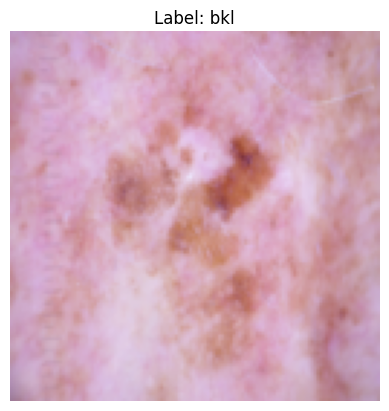

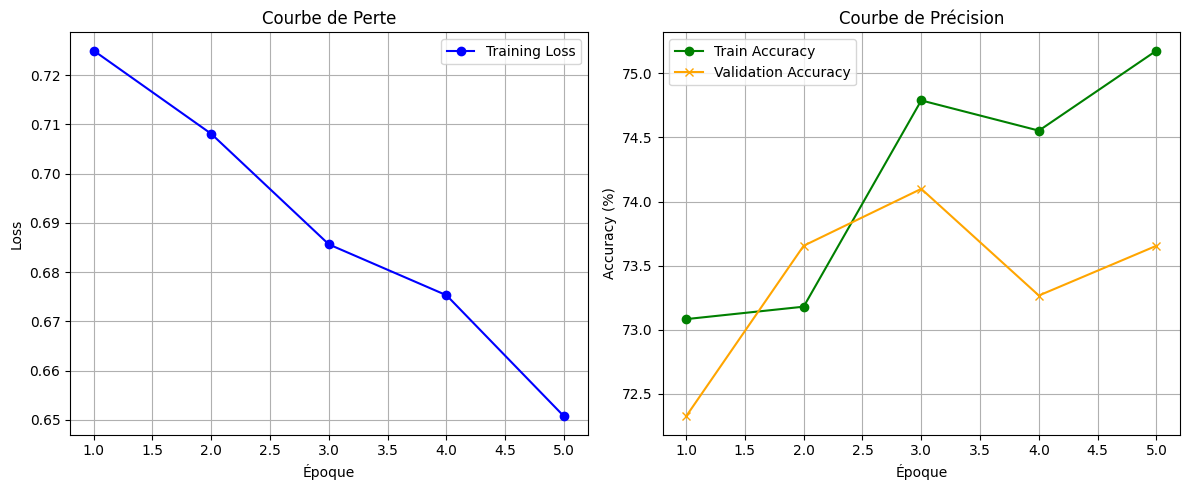

In [ ]:
# --- Initialisation des listes pour courbes ---
train_losses = []
train_accuracies = []
val_accuracies = []

# --- Entraînement ---
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (preds == labels).sum().item()

    train_acc = 100 * correct_train / total_train
    val_acc = evaluate(model, val_loader)
    test_acc = evaluate(model, test_loader)

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch + 1}/{epochs} | Loss: {running_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}% | Test Acc: {test_acc:.2f}%")

# --- Exemple affichage d’une image ---
sample_img, sample_label = dataset[0]
plt.imshow(sample_img.permute(1, 2, 0))
plt.title(f"Label: {classes[sample_label]}")
plt.axis('off')
plt.show()

# --- Affichage des courbes de performance ---
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 5))

# Courbe de perte (loss)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss', color='blue', marker='o')
plt.title('Courbe de Perte')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', color='green', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', color='orange', marker='x')
plt.title('Courbe de Précision')
plt.xlabel('Époque')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
